<a href="https://colab.research.google.com/github/Starleen1996/Machine_Learning_modelos/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

In [91]:
#Nota: Para correr las lineas de este proyecto debemos llamar el archivo: /content/prestacar.csv

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [92]:
import pandas as pd


In [93]:
datos = pd.read_csv('/content/prestacar.csv')

In [94]:
datos.head()

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [95]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54025 entries, 0 to 54024
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ingresos_cliente    54025 non-null  float64
 1   anualidad_prestamo  54025 non-null  float64
 2   años_casa_propia    54025 non-null  float64
 3   telefono_trab       54025 non-null  int64  
 4   evaluacion_ciudad   54025 non-null  float64
 5   score_1             54025 non-null  float64
 6   score_2             54025 non-null  float64
 7   score_3             54025 non-null  float64
 8   score_social        54025 non-null  float64
 9   cambio_telefono     54025 non-null  float64
 10  moroso              54025 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.5 MB


In [96]:
X = datos.drop(columns='moroso', axis=1)
y = datos['moroso']

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

modelo = DecisionTreeClassifier()
modelo.fit(X, y)
modelo.score(X, y)

1.0

In [98]:
print(f'La exactitud del modelo es de {modelo.score(X, y) * 100:.2f}%')

La exactitud del modelo es de 100.00%


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [99]:
from sklearn.model_selection import train_test_split



In [100]:
X,X_test,y,y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5) # Para realizar el entrenamiento del modelo
X_train,X_val,y_train,y_val = train_test_split(X, y, stratify=y, random_state=5) # Para realizar la validación del modelo, cuando no se define el tamaño de validación se define por defecto el 0.25

In [101]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de {modelo.score(X_train, y_train) * 100:.2f}%')
print(f'La exactitud del modelo con el conjunto de validación es de {modelo.score(X_val, y_val) * 100:.2f}%')

La exactitud del modelo con el conjunto de entrenamiento es de 100.00%
La exactitud del modelo con el conjunto de validación es de 84.98%


In [102]:
# establecemos una profundidad para el modelo árbol de decisión
#La exactitudes una metrica que no nos dice mucho
modelo = DecisionTreeClassifier(max_depth=10) # 10 niveles
modelo.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de {modelo.score(X_train, y_train) * 100:.2f}%')
print(f'La exactitud del modelo con el conjunto de validación es de {modelo.score(X_val, y_val) * 100:.2f}%')

La exactitud del modelo con el conjunto de entrenamiento es de 92.06%
La exactitud del modelo con el conjunto de validación es de 90.61%


### Evaluando el modelo

In [103]:
#Importamos una nueva herramienta llamada la matriz de confusión
from sklearn.metrics import confusion_matrix

In [104]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
print(matriz_confusion)

[[10360   119]
 [  959    43]]


In [105]:
from sklearn.metrics import ConfusionMatrixDisplay

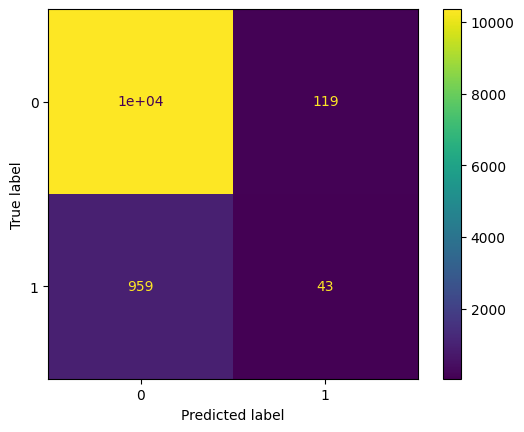

In [106]:
## Esto es una matriz de confusión
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

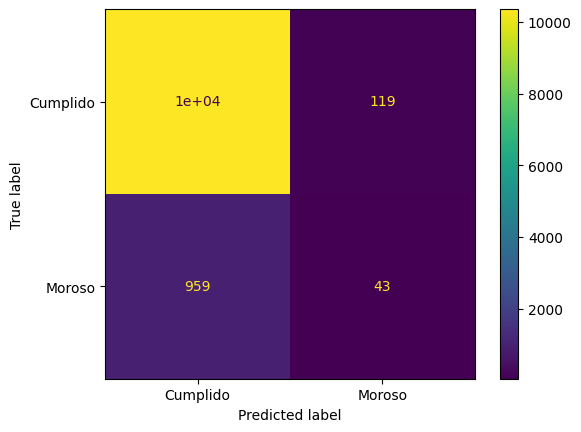

In [107]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix =matriz_confusion, display_labels= ['Cumplido','Moroso'])
visualizacion.plot();

# El modelo predijo cumplido mas de 10.000 clientes.
# 957 clientes se mostraron como cumplidos pero realmente eran morosos, un riesgo alto
# el modelo dijo que 120 clientes eran morosos cuando realmente eran cumplidos.
# Unicamente identifico como morosos de forma efectiva 42 clientes.

#### Utilizando otro modelo

In [108]:
#El primer paso es identificar cómo importar el algoritmo Random Forest a partir de la documentación, que siempre trae ejemplos de cómo utilizar la función. La importación se puede hacer con el siguiente código:
from sklearn.ensemble import RandomForestClassifier

In [109]:
#Ahora que hemos importado el algoritmo, solo necesitamos instanciar el RandomForestClassifier en una variable y utilizar el parámetro max_depth = 10 así como hicimos con el árbol de decisión. Esto evitará que el modelo se ajuste demasiado a los datos de entrenamiento. Después de eso, podemos ajustar el modelo con datos de entrenamiento y verificar el resultado de la precisión:
#Al ejecutar el código, obtendremos el siguiente resultado:
#Precisión de entrenamiento: 0.9154761904761904
#Precisión de validación: 0.9127253723543245
#Este resultado muestra que el RandomForest tuvo una precisión mejor que el árbol de decisión, indicando que el modelo tiene una tasa de aciertos general mejor.
modelo_R = RandomForestClassifier(max_depth = 10)
modelo_R.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {modelo_R.score(X_train, y_train)}')
print(f'Precisión de validación: {modelo_R.score(X_val, y_val)}')

Precisión de entrenamiento: 0.9153600464576074
Precisión de validación: 0.9129866736347008


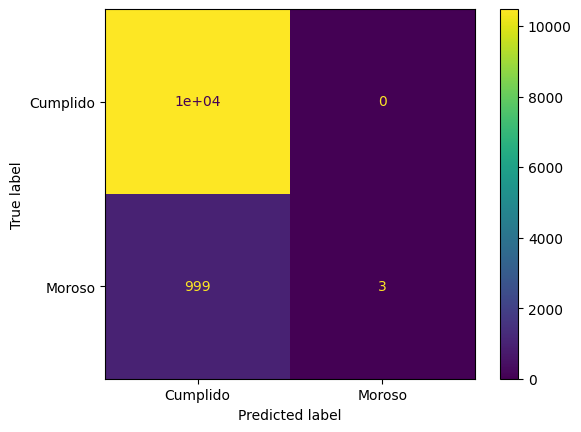

In [110]:
#Para completar, podemos generar una matriz de confusión a partir del modelo y verificar la cantidad de aciertos y errores para cada clase. Podemos crear la matriz con el siguiente código:
y_previsto_1 = modelo_R.predict(X_val)
matriz_confusion_1 = confusion_matrix(y_val, y_previsto_1)
visualizacion_1 = ConfusionMatrixDisplay(confusion_matrix= matriz_confusion_1,
                                      display_labels = ['Cumplido', 'Moroso'])
visualizacion_1.plot();

#A partir de esta matriz, nos damos cuenta de que a pesar de una precisión mayor, el modelo RandomForest no logra identificar casi ningún cliente moroso, indicando un resultado bastante malo en relación al modelo de árbol de decisión.

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [112]:
45/(45+123) # precisión 26% de precision

0.26785714285714285

In [113]:
print(f'La preciisón del modelo es de: {precision_score(y_val, y_previsto)}')
print(f'La Sensibilidad(Recall) del modelo es de: {recall_score(y_val, y_previsto)}')
print(f'La Exactitud (accuracy)  del modelo es de: {accuracy_score(y_val, y_previsto)}')

La preciisón del modelo es de: 0.2654320987654321
La Sensibilidad(Recall) del modelo es de: 0.04291417165668663
La Exactitud (accuracy)  del modelo es de: 0.9061057399181256


In [114]:
print(f'El F1 Score  del modelo es de: {f1_score(y_val, y_previsto)}')
# Mientras mas lejos de 1, el modelo se esta desempeñando muy mal

El F1 Score  del modelo es de: 0.07388316151202749


### Curva ROC

In [115]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [116]:
from sklearn.metrics import RocCurveDisplay

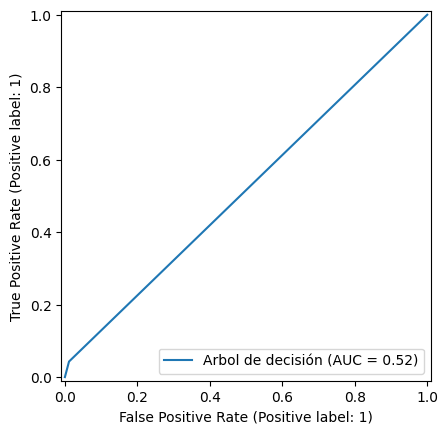

In [117]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Arbol de decisión')
# Nota: viendo la curva recta , existe aleatoriedad por ende el modelo no es efectivo, es deficiente.

In [118]:
from sklearn.metrics import roc_auc_score

In [119]:
print(f'El área bajo la curva ROC es de: {roc_auc_score(y_val, y_previsto)}')

El área bajo la curva ROC es de: 0.5157790631162524


### Curva de  precisión x sensibilidad

In [120]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [121]:
from sklearn.metrics import PrecisionRecallDisplay

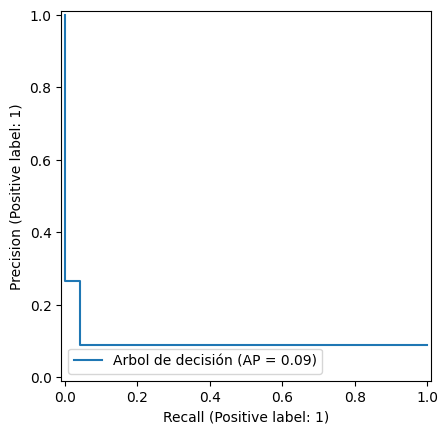

In [122]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Arbol de decisión')
#

In [123]:
from sklearn.metrics import average_precision_score


In [124]:
print(f'El área bajo la curva de precisión y sensibilidad es de: {average_precision_score(y_val, y_previsto)}')

El área bajo la curva de precisión y sensibilidad es de: 0.0949201079432299


### Informe de métricas

In [125]:
from sklearn.metrics import classification_report

In [126]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.27      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [127]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_validate

In [128]:
modelo = DecisionTreeClassifier(max_depth=10)
KF= KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_val_score(modelo, X,y, cv=KF)
print(cv_resultados)
print(f'La exactitud del modelo es de {cv_resultados.mean() * 100:.2f}%')
#

[0.91290147 0.90777439 0.90712108 0.91332753 0.89928136]
La exactitud del modelo es de 90.81%


In [129]:
modelo = DecisionTreeClassifier(max_depth=10)
KF= KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_val_score(modelo, X,y, cv=KF)
cv_resultados

array([0.91388133, 0.90820993, 0.90712108, 0.91321864, 0.8997169 ])

In [130]:
promedio = cv_resultados.mean()
desvio_std = cv_resultados.std()
print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvio tipico es de: {desvio_std}')
print(f'El intervalo de confianza es de: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]')


El promedio de la exactitud es de: 0.9084295757550468
El desvio tipico es de: 0.005105445998922807
El intervalo de confianza es de: [0.8982186837572012,0.9186404677528924]


### Validación cruzada con sensibilidad

In [131]:
def intervalo_confianza(resultados):
      promedio = resultados.mean()
      desvio_std = resultados.std()
      return f'El intervalo de confianza es de: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]'


In [132]:
modelo = DecisionTreeClassifier(max_depth=10)
KF= KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_val_score(modelo, X,y, cv=KF,scoring='recall')
cv_resultados

array([0.02774108, 0.01856436, 0.02091021, 0.01697128, 0.02427746])

In [133]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es de: [0.013897773643088099,0.029487980269612406]'

In [134]:

# Otro ejemplo - calculando todas las metricas

modelo = DecisionTreeClassifier(max_depth = 10)
KF = KFold(n_splits=5, shuffle = True, random_state = 5)
# Aquí sí se puede pasar un diccionario o lista de métricas
cv_resultados = cross_validate( modelo, X, y, cv=KF, scoring=['accuracy','recall','precision','f1'])

print(cv_resultados)

{'fit_time': array([0.22378039, 0.23949122, 0.22135282, 0.23272371, 0.22531891]), 'score_time': array([0.01224518, 0.01196361, 0.01172137, 0.17884541, 0.01222539]), 'test_accuracy': array([0.91344584, 0.90777439, 0.90744774, 0.91332753, 0.89982578]), 'test_recall': array([0.02774108, 0.0210396 , 0.0196802 , 0.0156658 , 0.02312139]), 'test_precision': array([0.2625    , 0.23287671, 0.23188406, 0.22222222, 0.21052632]), 'test_f1': array([0.05017921, 0.03859251, 0.03628118, 0.02926829, 0.04166667])}


In [135]:
#Para generar el intervalo de confianza para las métricas, podemos calcular la media y la desviación estándar de cada métrica y utilizar la función print() para presentar el resultado en pantalla.
#De este modo, podemos construir una función para crear este informe, usando un for para recorrer cada una de las claves del diccionario que acceden a las métricas:

def informe_metricas(resultados):
    for metrica in ['test_accuracy','test_recall','test_precision','test_f1']:
        promedio = resultados[metrica].mean()
        desvio_std = resultados[metrica].std()
        print(f'Intervalo de confianza({metrica}): [{promedio-2*desvio_std}, {min(promedio+2*desvio_std, 1.0)}]')

In [136]:
informe_metricas(cv_resultados)

Intervalo de confianza(test_accuracy): [0.8983822721314805, 0.9183462363251571]
Intervalo de confianza(test_recall): [0.013493287585621598, 0.029405939459777694]
Intervalo de confianza(test_precision): [0.1975025155632451, 0.2665012077613459]
Intervalo de confianza(test_f1): [0.025510939652137035, 0.05288420373606412]


### Estratificando los datos

In [137]:
datos['moroso'].value_counts(normalize= True)

,proportion
moroso,
0,0.912707
1,0.087293


In [138]:
from sklearn.model_selection import StratifiedKFold # Aseguramos que la proporción de cada clase se mantenga

In [139]:
modelo = DecisionTreeClassifier(max_depth=10)
Skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_val_score(modelo, X,y, cv=Skf,scoring='recall')

In [140]:
intervalo_confianza(cv_resultados)
# Estamos trabajando con un conjunto de datos desiquilibrado

'El intervalo de confianza es de: [0.019807867377935794,0.036065557673667405]'

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [141]:
from imblearn.over_sampling import SMOTE # Este modulo ayuda a balncear los datos de la BD

In [142]:
over_sampling = SMOTE()
x_balanceada, y_balanceada = over_sampling.fit_resample(X, y)

In [143]:
y_balanceada.value_counts(normalize=True)

,proportion
moroso,
0,0.5
1,0.5


In [144]:
y_balanceada.value_counts()

,count
moroso,
0,41912
1,41912


In [145]:
modelo = DecisionTreeClassifier(max_depth=10)
Skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_val_score(modelo, x_balanceada,y_balanceada, cv=Skf,scoring='recall')

In [146]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es de: [0.7057345814306725,0.7621976192459933]'

### Pipeline para validación

In [147]:
from imblearn.pipeline import Pipeline as imbpipeline


In [148]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arbol', modelo)])

In [149]:
Skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_val_score(pipeline, X,y, cv=Skf,scoring='recall')

In [150]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es de: [0.19060927969938404,0.32621974636217865]'

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [151]:
from imblearn.under_sampling import NearMiss

In [152]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arbol', modelo)])
Skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_val_score(pipeline, X,y, cv=Skf,scoring='recall')

In [153]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es de: [0.6244186476554122,0.7030772194184761]'

### Probando el modelo

In [154]:
undersample= NearMiss(version=3)
x_balanceada, y_balanceada = undersample.fit_resample(X, y)

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



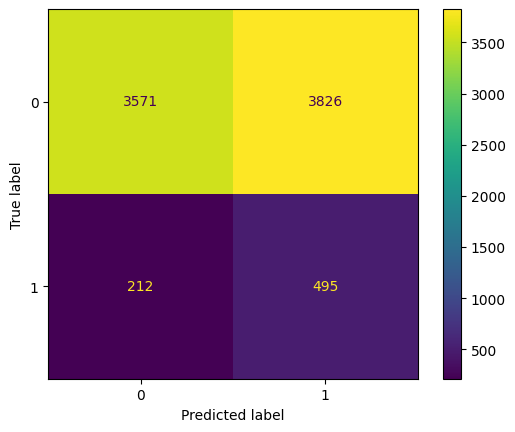

In [155]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceada, y_balanceada)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);

# Se evidencia una mayor detección de clientes morosos (494)
# Se pierde presición para detectar clientes pagadores, sin embargo a la compañia le interesa es no perder dinero en clientes morosos.
# Se mejoro el (recall) y se llevo hasta un 0.7

#### OTRO EJEMPLO
Durante la clase, exploramos dos estrategias de balanceo de datos: oversampling y undersampling. En cada una de ellas utilizamos un algoritmo diferente, el SMOTE para generar nuevos datos sintéticos y el NearMiss para mantener datos que tienen un patrón cercano entre las clases.

Estos no son los únicos algoritmos existentes y el oversampling y undersampling no necesitan ser utilizados de manera aislada. Es posible combinar las dos estrategias en una sola para equilibrar los puntos negativos de cada una de ellas. Esto no quiere decir que esta estrategia sea más efectiva en todas las ocasiones, pero es una opción que puede ser explorada en los proyectos.

Como desafío, utiliza el algoritmo SMOTEENN, que combina el oversampling con SMOTE y el undersampling con el ENN (Edited Nearest Neighbours), para balancear los datos y observa los resultados obtenidos por el modelo usando el pipeline y la validación cruzada.

Como un consejo, revisa la documentación del método SMOTEENN a partir de este enlace para identificar cómo importar el método y cómo utilizarlo.

In [156]:
#Como primer paso, vamos a importar el método SMOTEENN desde la sección combine de la biblioteca imblearn:
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import StratifiedKFold, cross_validate

In [162]:
#Los pasos para utilizar el método con la validación cruzada son los mismos. Debemos instanciar el modelo y crear un pipeline con los pasos de balanceo de los datos y ajuste del modelo:
modelo_1 = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('smoteenn', SMOTEENN()), ('arbol', modelo_1)])

In [164]:
def intervalo_confianza_1(resultados, clave='test_score'):
    scores = resultados[clave]
    promedio = scores.mean()
    desvio_std = scores.std()
    return f'El intervalo de confianza es de: [{promedio - 2*desvio_std}, {min(promedio + 2*desvio_std, 1)}]'


In [165]:
#Después de eso, podemos utilizar la validación cruzada con el StratifiedKFold para mantener la proporción en los datos y utilizar el método cross_validate con el pipeline, evaluando el rendimiento con la métrica recall y generando el intervalo de confianza de esa métrica:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring = 'recall')
intervalo_confianza_1(cv_resultados)

'El intervalo de confianza es de: [0.22884977749842644, 0.49854895413690475]'